In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ciro_tahmin.csv")

In [3]:
df.head()

,YilAygun,Gun,Suberef,SatisAdet,Ciro,MagazaSinif,SehirRef,SubeAcilisTarihi,MagazaM2,LokasyonTip,Magaza_Kapalimi,MagazaKapanmaAciklama,LFL_YilAyGun,LFL_Ciro
0,20200510,2020-05-10,1047260005617,NaN,NaN,B,6,2007-08-23,128.0,AVM,1,yok,20190512,23508.0
1,20201207,2020-12-07,1047260008508,7.0,3543.0,C,6,2018-10-01,183.0,AVM,0,NaN,20191209,4551.0
2,20200301,2020-03-01,1047260005617,22.0,12893.0,B,6,2007-08-23,128.0,AVM,0,NaN,20190303,22669.0
3,20211016,2021-10-16,1047260009268,104.0,112933.0,B,35,2019-10-07,195.0,AVM,0,NaN,20201017,52720.0
4,20210531,2021-05-31,1047260005431,185.0,113034.0,A+,34,2007-09-21,262.0,AVM,0,NaN,20200601,39759.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45731 entries, 0 to 45730
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YilAygun               45731 non-null  int64  
 1   Gun                    45731 non-null  object 
 2   Suberef                45731 non-null  int64  
 3   SatisAdet              40023 non-null  float64
 4   Ciro                   40023 non-null  float64
 5   MagazaSinif            45731 non-null  object 
 6   SehirRef               45731 non-null  int64  
 7   SubeAcilisTarihi       45731 non-null  object 
 8   MagazaM2               45709 non-null  float64
 9   LokasyonTip            45429 non-null  object 
 10  Magaza_Kapalimi        45731 non-null  int64  
 11  MagazaKapanmaAciklama  4056 non-null   object 
 12  LFL_YilAyGun           45731 non-null  int64  
 13  LFL_Ciro               28629 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 4.9+ 

In [5]:
df.shape

(45731, 14)

In [6]:
df.isnull().sum()

YilAygun                     0
Gun                          0
Suberef                      0
SatisAdet                 5708
Ciro                      5708
MagazaSinif                  0
SehirRef                     0
SubeAcilisTarihi             0
MagazaM2                    22
LokasyonTip                302
Magaza_Kapalimi              0
MagazaKapanmaAciklama    41675
LFL_YilAyGun                 0
LFL_Ciro                 17102
dtype: int64

### Spesifik mağaza için yaklaşım

In [7]:
df["Suberef"].value_counts()

Suberef
1047260005617    1214
1047260005730    1214
1047260006703    1214
1047260005977    1214
1047260005833    1214
1047260005980    1214
1047260008249    1214
1047260005726    1214
1047260005503    1214
1047260008528    1214
1047260007260    1214
1047260004733    1214
1047260005831    1214
1047260005233    1214
1047260006222    1214
1047260005725    1214
1047260005361    1214
1047260008508    1214
1047260005723    1214
1047260005722    1214
1047260008089    1214
1047260005694    1214
1047260005851    1214
1047260005724    1214
1047260005974    1214
1047260005832    1214
1047260005431    1214
1047260005829    1214
1047260006940    1214
1047260005496    1214
1047260005835    1214
1047260005432    1214
1047260005973    1214
1047260006326    1213
1047260008969    1000
1047260008970     973
1047260009268     924
1047260009775     554
1047260009774     492
1047260010319     302
1047260010581     189
1047260011362      22
Name: count, dtype: int64

In [8]:
sub_df = df[(df["Suberef"] == 1047260005980)]

In [9]:
sub_df.isnull().sum()

YilAygun                    0
Gun                         0
Suberef                     0
SatisAdet                 165
Ciro                      165
MagazaSinif                 0
SehirRef                    0
SubeAcilisTarihi            0
MagazaM2                    0
LokasyonTip                 0
Magaza_Kapalimi             0
MagazaKapanmaAciklama    1113
LFL_YilAyGun                0
LFL_Ciro                  476
dtype: int64

In [10]:
sub_df["Gun"] = pd.to_datetime(sub_df["Gun"])

C:\Users\Erkut\AppData\Local\Temp\ipykernel_9140\924034514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["Gun"] = pd.to_datetime(sub_df["Gun"])


In [11]:
sub_df.head()

,YilAygun,Gun,Suberef,SatisAdet,Ciro,MagazaSinif,SehirRef,SubeAcilisTarihi,MagazaM2,LokasyonTip,Magaza_Kapalimi,MagazaKapanmaAciklama,LFL_YilAyGun,LFL_Ciro
61,20200308,2020-03-08,1047260005980,70.0,25547.0,A,7,2005-07-01,174.0,AVM,0,NaN,20190308,3885.0
73,20190621,2019-06-21,1047260005980,62.0,23140.0,A,7,2005-07-01,174.0,AVM,0,NaN,20180622,NaN
101,20190320,2019-03-20,1047260005980,24.0,10982.0,A,7,2005-07-01,174.0,AVM,0,NaN,20180321,NaN
160,20190607,2019-06-07,1047260005980,82.0,36623.0,A,7,2005-07-01,174.0,AVM,0,NaN,20180622,NaN
282,20190317,2019-03-17,1047260005980,51.0,28101.0,A,7,2005-07-01,174.0,AVM,0,NaN,20180318,NaN


In [12]:
sub_df.sort_values(by='Gun', inplace=True)

C:\Users\Erkut\AppData\Local\Temp\ipykernel_9140\1786712186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.sort_values(by='Gun', inplace=True)


In [13]:
sub_df.head()

,YilAygun,Gun,Suberef,SatisAdet,Ciro,MagazaSinif,SehirRef,SubeAcilisTarihi,MagazaM2,LokasyonTip,Magaza_Kapalimi,MagazaKapanmaAciklama,LFL_YilAyGun,LFL_Ciro
38840,20190101,2019-01-01,1047260005980,20.0,13755.0,A,7,2005-07-01,174.0,AVM,0,NaN,20180101,NaN
31048,20190102,2019-01-02,1047260005980,19.0,12881.0,A,7,2005-07-01,174.0,AVM,0,NaN,20180103,NaN
25351,20190103,2019-01-03,1047260005980,165.0,82048.0,A,7,2005-07-01,174.0,AVM,0,NaN,20180104,NaN
20415,20190104,2019-01-04,1047260005980,115.0,54725.0,A,7,2005-07-01,174.0,AVM,0,NaN,20180105,NaN
491,20190105,2019-01-05,1047260005980,80.0,38586.0,A,7,2005-07-01,174.0,AVM,0,NaN,20180106,NaN


In [14]:
missing_values = sub_df['Ciro'].isnull()

In [15]:
missing_values

38840    False
31048    False
25351    False
20415    False
491      False
         ...  
37101    False
9125     False
24789    False
1019     False
40455    False
Name: Ciro, Length: 1214, dtype: bool

In [16]:
sub_df.loc[missing_values, "Ciro"] = sub_df.loc[missing_values, "LFL_Ciro"]

In [17]:
sub_df.isnull().sum()

YilAygun                    0
Gun                         0
Suberef                     0
SatisAdet                 165
Ciro                       32
MagazaSinif                 0
SehirRef                    0
SubeAcilisTarihi            0
MagazaM2                    0
LokasyonTip                 0
Magaza_Kapalimi             0
MagazaKapanmaAciklama    1113
LFL_YilAyGun                0
LFL_Ciro                  476
dtype: int64

In [18]:
sub_df["BirimFiyat"] = sub_df["Ciro"] / sub_df["SatisAdet"]

C:\Users\Erkut\AppData\Local\Temp\ipykernel_9140\3595753048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["BirimFiyat"] = sub_df["Ciro"] / sub_df["SatisAdet"]


In [19]:
na_satisadet = df["SatisAdet"].isnull()

In [20]:
sub_df["SatisAdet"].fillna(sub_df["Ciro"].shift(100) / sub_df["BirimFiyat"].shift(100), inplace=True)

C:\Users\Erkut\AppData\Local\Temp\ipykernel_9140\616954921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["SatisAdet"].fillna(sub_df["Ciro"].shift(100) / sub_df["BirimFiyat"].shift(100), inplace=True)


In [21]:
sub_df.isnull().sum()

YilAygun                    0
Gun                         0
Suberef                     0
SatisAdet                   5
Ciro                       32
MagazaSinif                 0
SehirRef                    0
SubeAcilisTarihi            0
MagazaM2                    0
LokasyonTip                 0
Magaza_Kapalimi             0
MagazaKapanmaAciklama    1113
LFL_YilAyGun                0
LFL_Ciro                  476
BirimFiyat                165
dtype: int64

In [22]:
cols_stay = ["Gun", "SatisAdet", "Ciro"]

In [23]:
drop_cols = [col for col in sub_df.columns if col not in cols_stay]

In [24]:
drop_cols

['YilAygun',
 'Suberef',
 'MagazaSinif',
 'SehirRef',
 'SubeAcilisTarihi',
 'MagazaM2',
 'LokasyonTip',
 'Magaza_Kapalimi',
 'MagazaKapanmaAciklama',
 'LFL_YilAyGun',
 'LFL_Ciro',
 'BirimFiyat']

In [25]:
sub_df.drop(drop_cols, axis = 1, inplace = True)

C:\Users\Erkut\AppData\Local\Temp\ipykernel_9140\622032014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.drop(drop_cols, axis = 1, inplace = True)


In [26]:
sub_df.head()

,Gun,SatisAdet,Ciro
38840,2019-01-01,20.0,13755.0
31048,2019-01-02,19.0,12881.0
25351,2019-01-03,165.0,82048.0
20415,2019-01-04,115.0,54725.0
491,2019-01-05,80.0,38586.0


In [27]:
sub_df = sub_df.set_index("Gun")

In [28]:
sub_df.head()

,SatisAdet,Ciro
Gun,,
2019-01-01,20.0,13755.0
2019-01-02,19.0,12881.0
2019-01-03,165.0,82048.0
2019-01-04,115.0,54725.0
2019-01-05,80.0,38586.0


### Daily Time Series Analysis

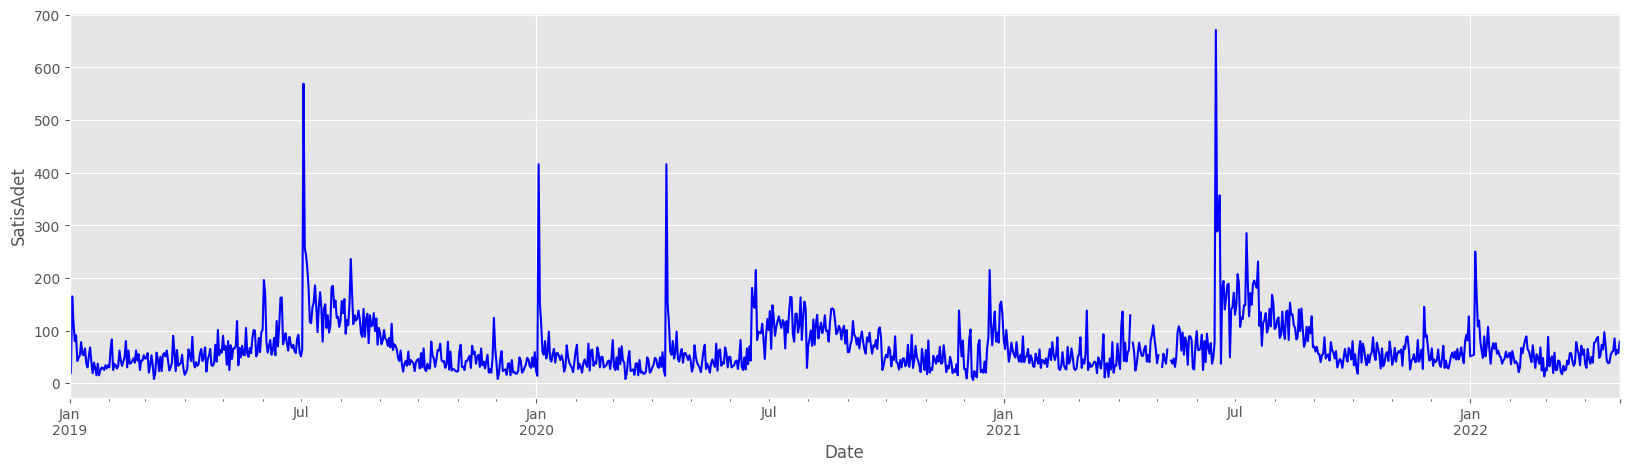

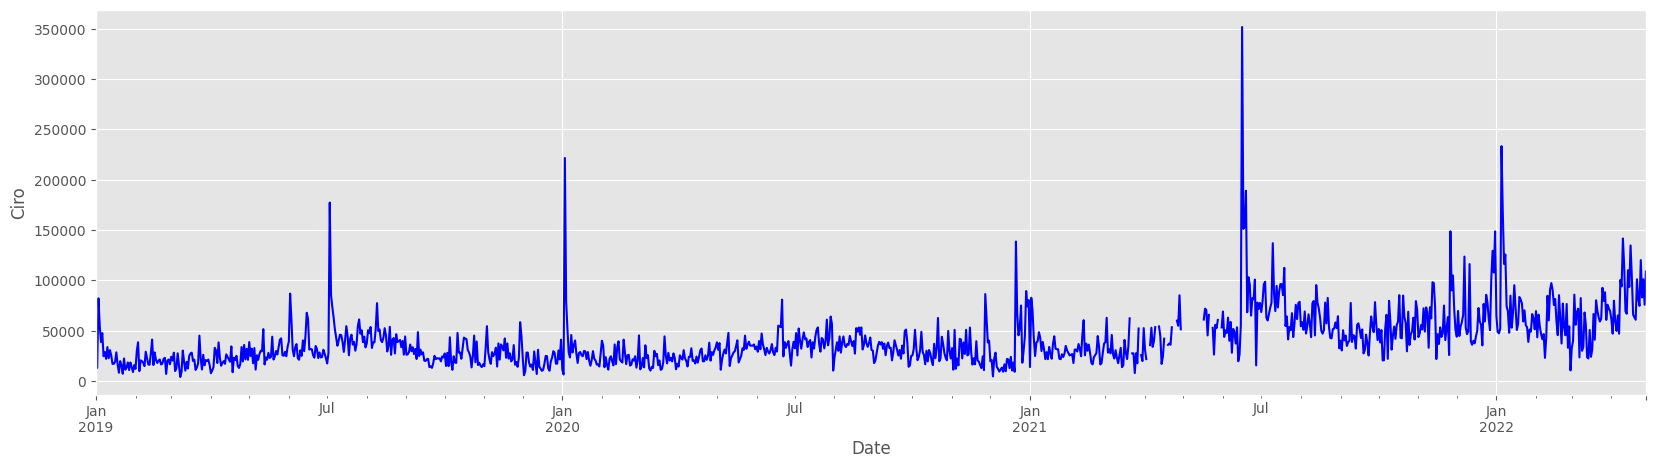

In [29]:
for col in sub_df.columns:
    plt.style.use("ggplot")
    sub_df[col].plot(color = "blue", figsize=(20, 5))
    
    plt.xlabel("Date")
    plt.ylabel(col)
    
    plt.show()

### Weekly Time Series

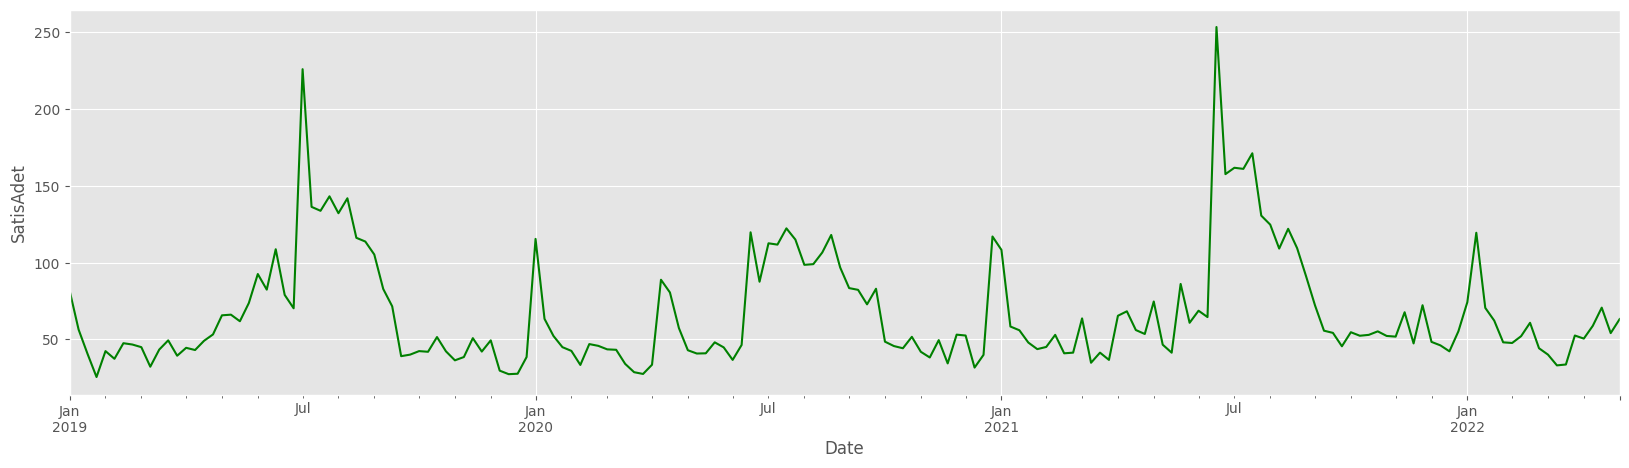

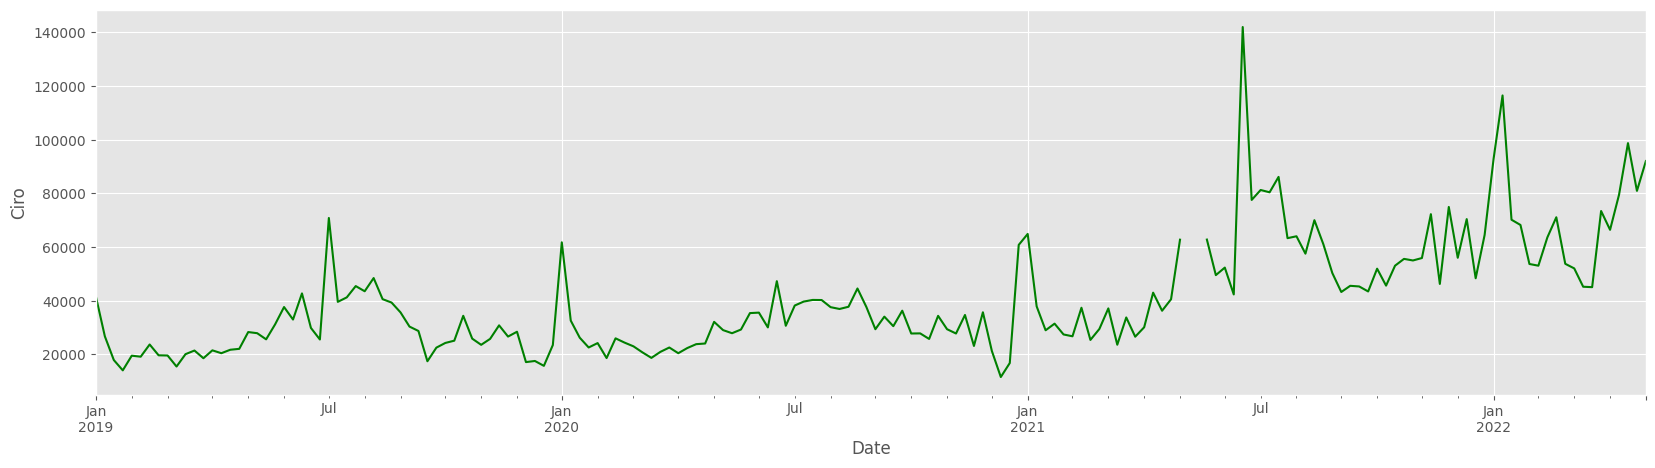

In [30]:
for col in sub_df.columns:
    sub_df[col].resample('W').mean().plot(color = "green", figsize=(20, 5))
    
    plt.xlabel("Date")
    plt.ylabel(col)
    
    plt.show()

### Monthly Series

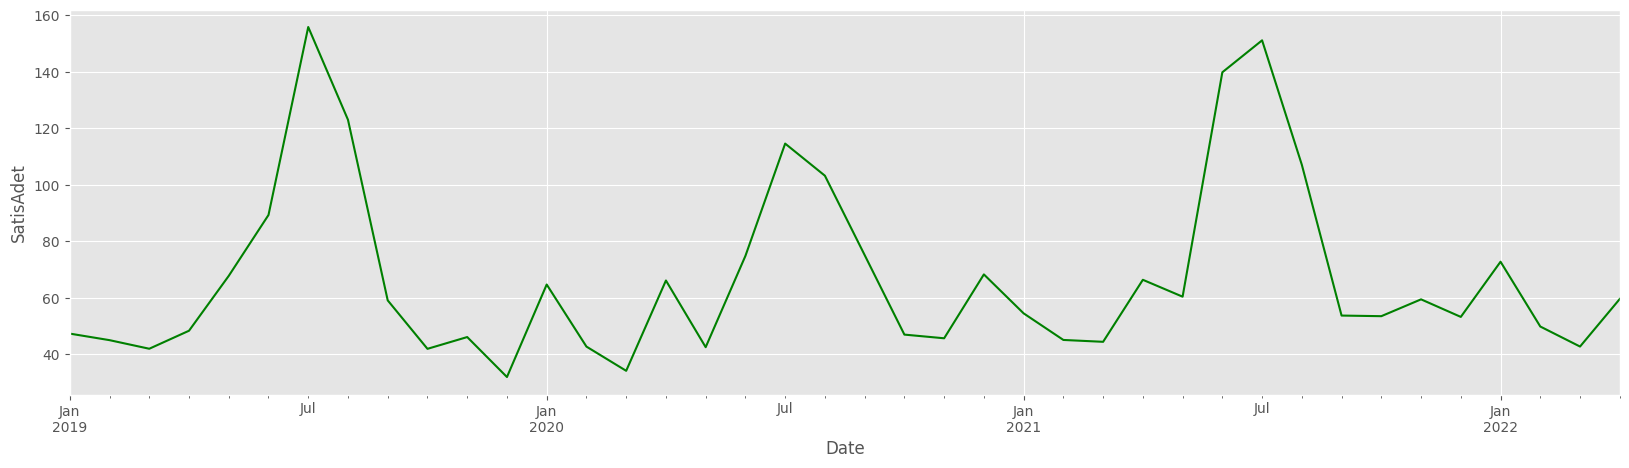

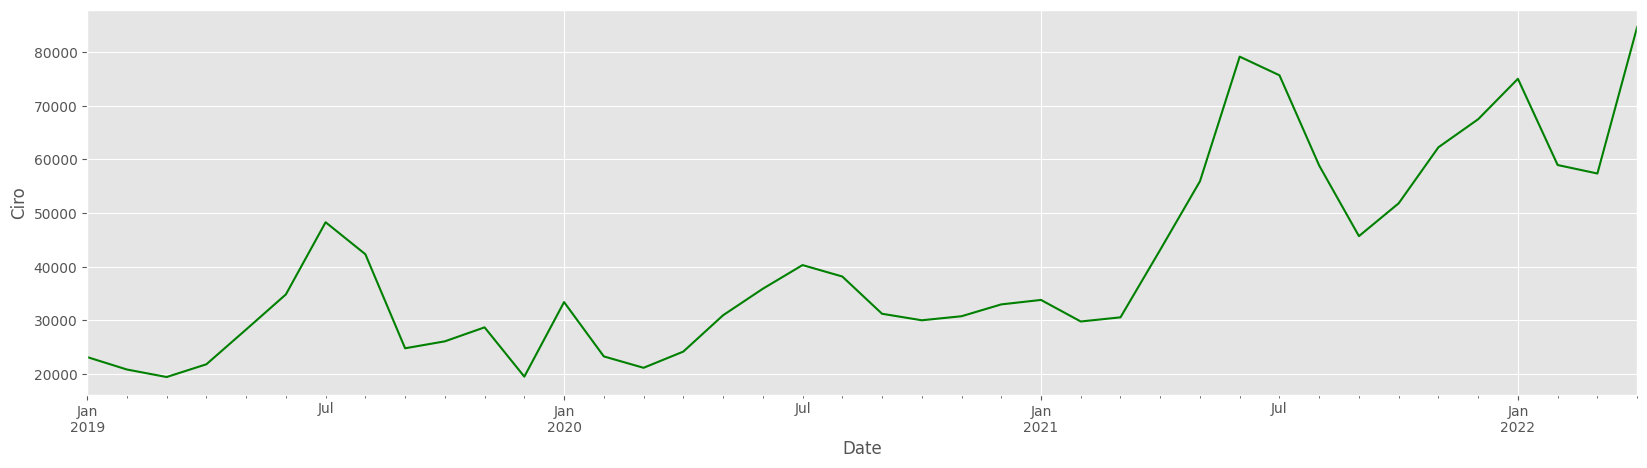

In [31]:
for col in sub_df.columns:
    sub_df[col].resample('M').mean().plot(color = "green", figsize=(20, 5))
    
    plt.xlabel("Date")
    plt.ylabel(col)
    
    plt.show()

### Kalan Eksik Değerler interpolasyon yöntemi ile davranış korunarak doldurulabilir.

In [32]:
for col in sub_df.columns:
    sub_df[col].interpolate(method = "linear", inplace = True)

In [33]:
sub_df.isnull().sum()

SatisAdet    0
Ciro         0
dtype: int64

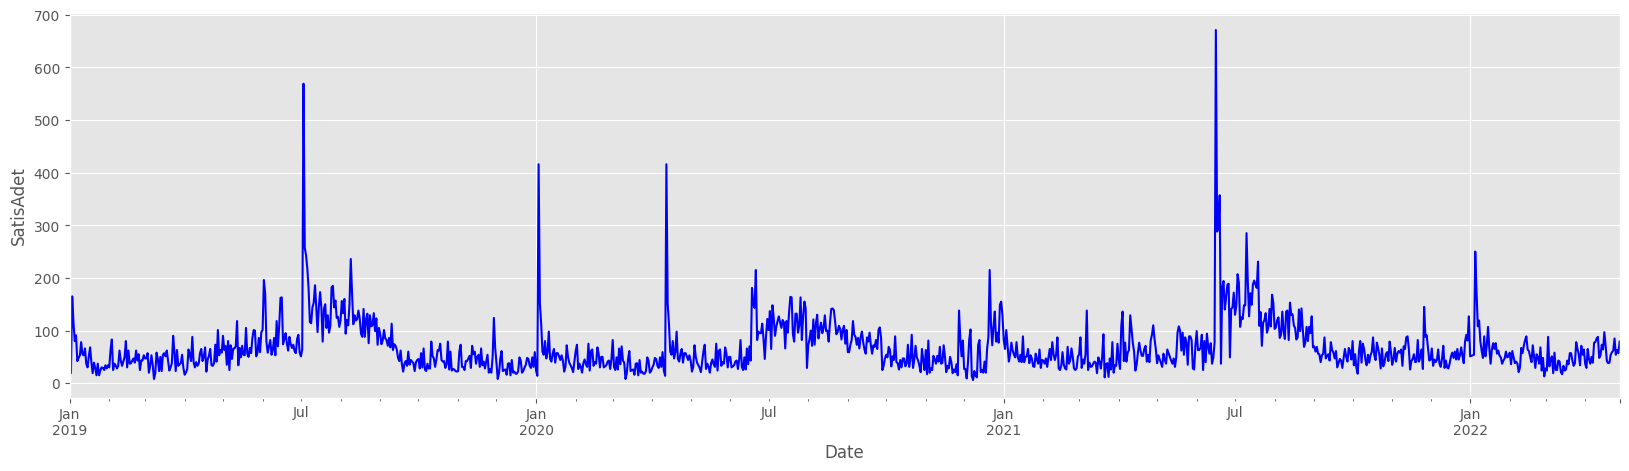

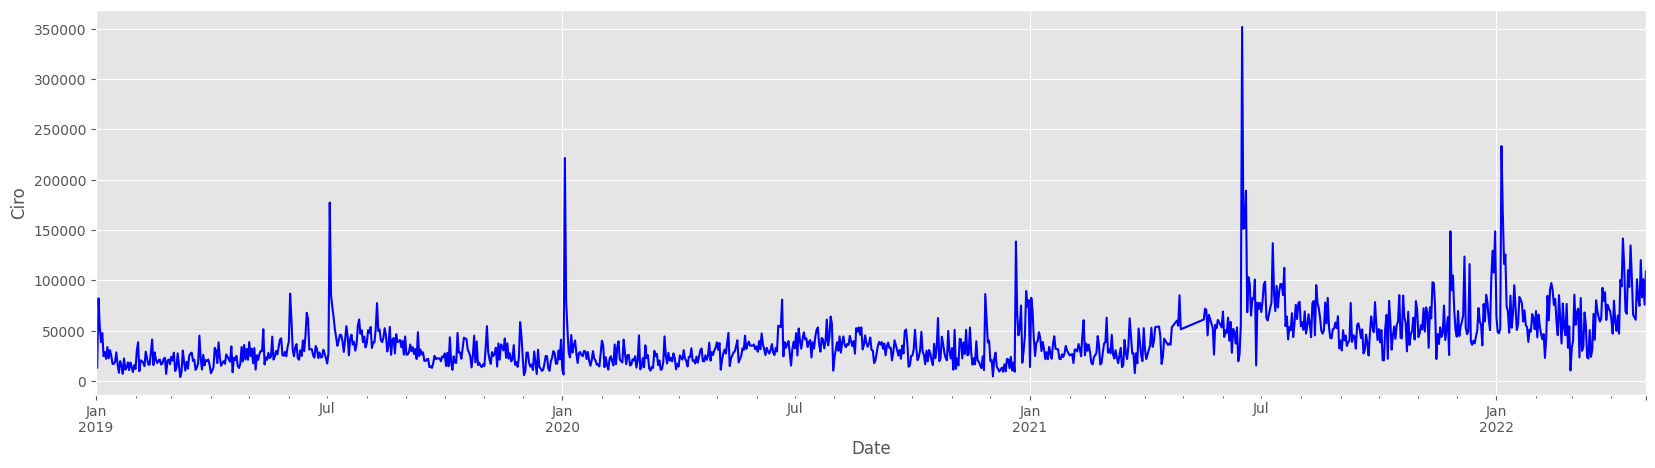

In [34]:
for col in sub_df.columns:
    plt.style.use("ggplot")
    sub_df[col].plot(color = "blue", figsize=(20, 5))
    
    plt.xlabel("Date")
    plt.ylabel(col)
    
    plt.show()

### Aggregation Statistics

In [35]:
sub_df.describe([0, 0.05, 0.50, 0.95, 0.99]).T

,count,mean,std,min,0%,5%,50%,95%,99%,max
SatisAdet,1214.0,67.483526,49.488797,6.0,6.0,22.0,55.0,149.0,229.31,671.0
Ciro,1214.0,40523.056013,26734.087713,3885.0,3885.0,13209.3,33678.0,85218.3,136555.98,351571.0


### Density Plots

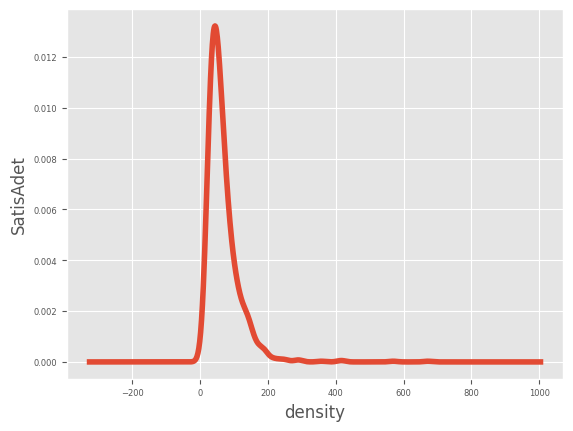

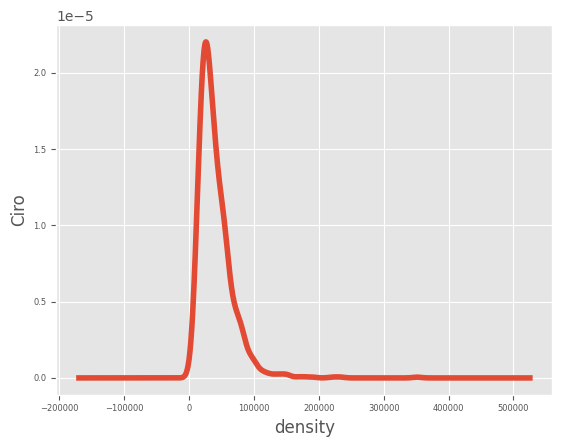

In [36]:
for col in sub_df.columns:
    plt.style.use("ggplot")
    
    sub_df[col].plot(kind = "density", linewidth = 4, fontsize = 6)
    
    plt.xlabel("density")
    plt.ylabel(col)
    
    plt.show()

### Correlation

In [37]:
corr = sub_df.corr()

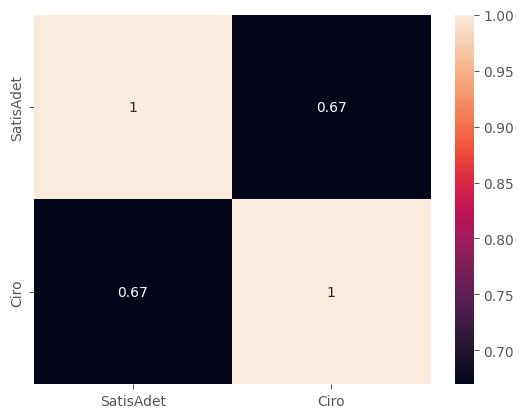

In [38]:
sns.heatmap(corr,
            annot=True)

plt.show()

### Outliers

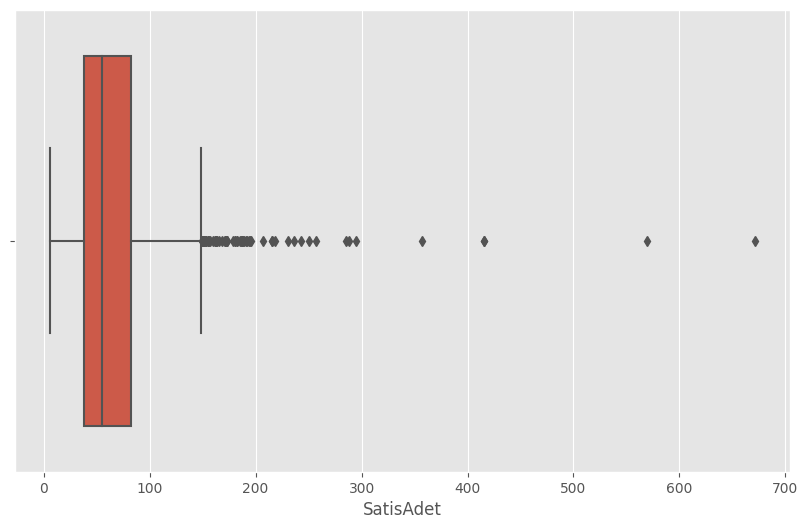

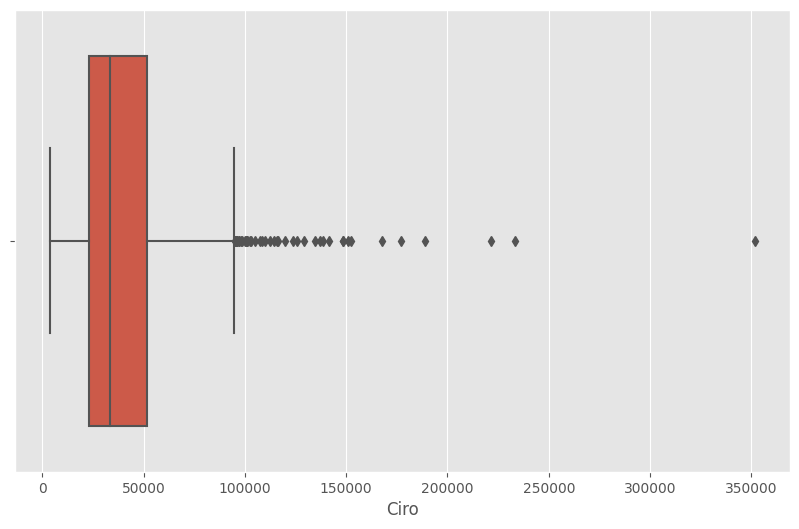

In [39]:
for col in sub_df.columns:
    plt.figure(figsize = (10, 6))
    sns.boxplot(x = sub_df[col])
    plt.show()

### Partial  AutoCorrelation

In [40]:
from statsmodels.graphics.tsaplots import plot_pacf

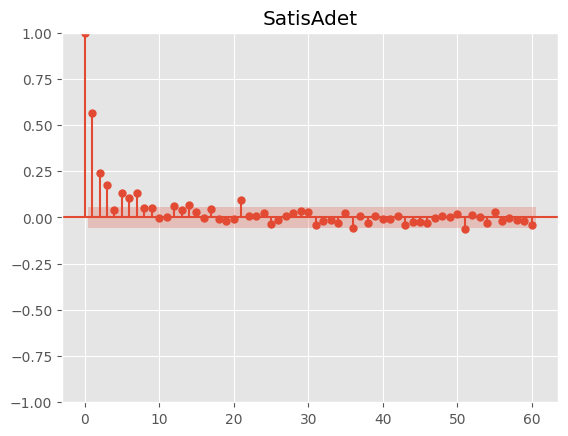

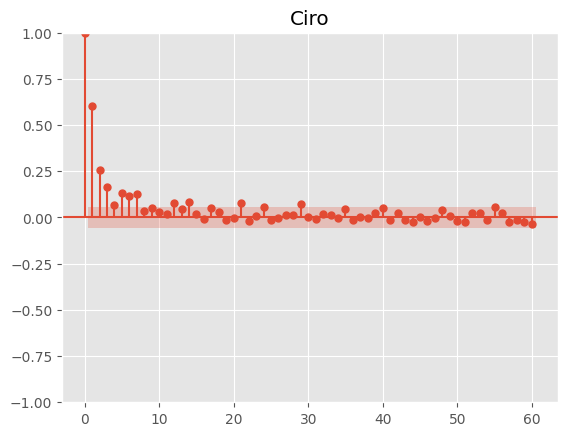

In [41]:
for col in sub_df.columns:
    
    fig = plot_pacf(sub_df[col].resample("D").mean(), lags=60)
    
    plt.title(col)
    plt.show()

### AutoCorrelation

In [42]:
from statsmodels.graphics.tsaplots import plot_acf

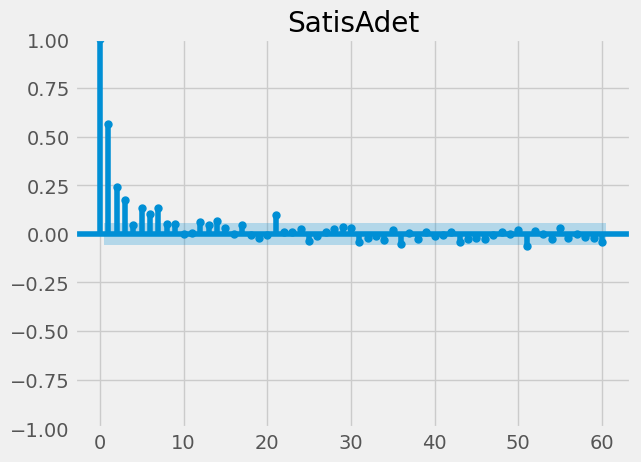

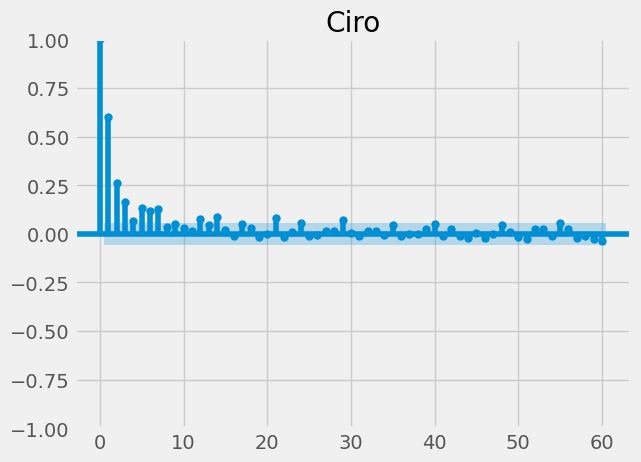

In [43]:
for col in sub_df.columns:
    plt.style.use('fivethirtyeight')
    fig = plot_pacf(sub_df[col], lags=60)
    
    plt.title(col)
    plt.show()

### AutoCorrelation ve Partial AutoCorrelation mevcut.

### Seasonality

In [44]:
import statsmodels.api as sm

### Satis Adet Seasonality

In [45]:
decomposition = sm.tsa.seasonal_decompose(sub_df["SatisAdet"])

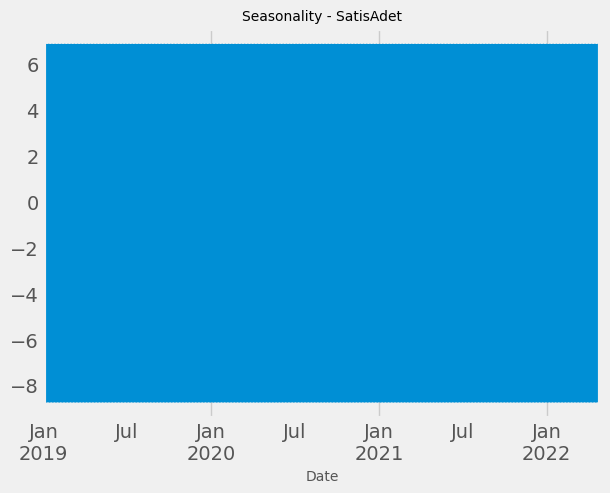

In [46]:
seasonality = decomposition.seasonal


seasonality.plot()

plt.xlabel("Date", fontsize=10)

plt.title("Seasonality - SatisAdet", fontsize=10)

plt.show()

### Ciro Seasonality

In [47]:
decomposition_ciro = sm.tsa.seasonal_decompose(sub_df["Ciro"])

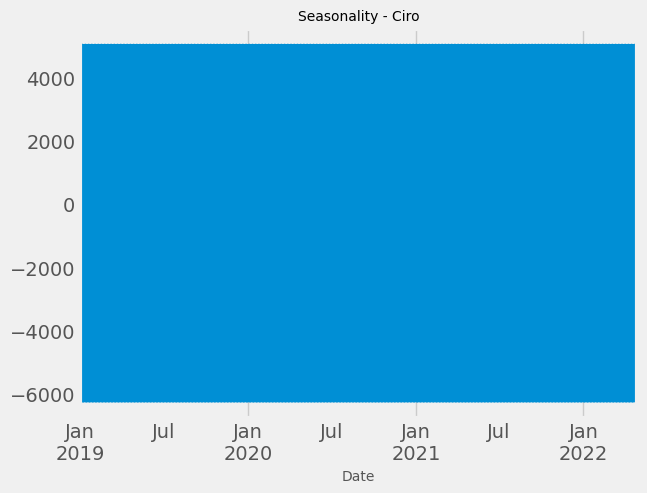

In [48]:
seasonality = decomposition_ciro.seasonal


seasonality.plot()

plt.xlabel("Date", fontsize=10)

plt.title("Seasonality - Ciro", fontsize=10)

plt.show()

### Noise - SatisAdet

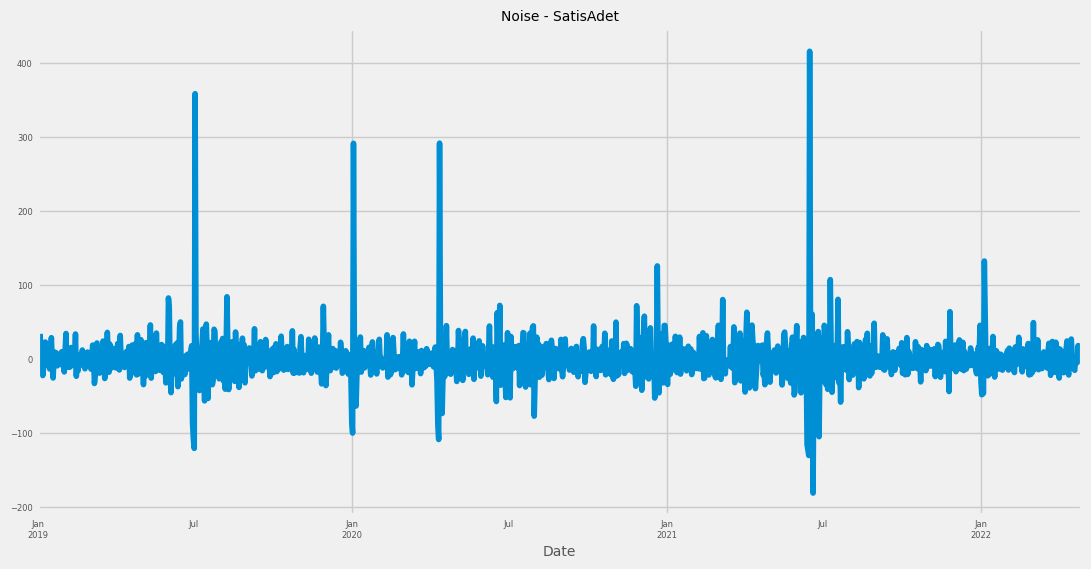

In [49]:
noise_satis = decomposition.resid

noise_satis.plot(figsize=(12, 6), fontsize=6)

plt.xlabel('Date', fontsize=10)

plt.title('Noise - SatisAdet', fontsize=10)

plt.show()

#### Noise-Ciro

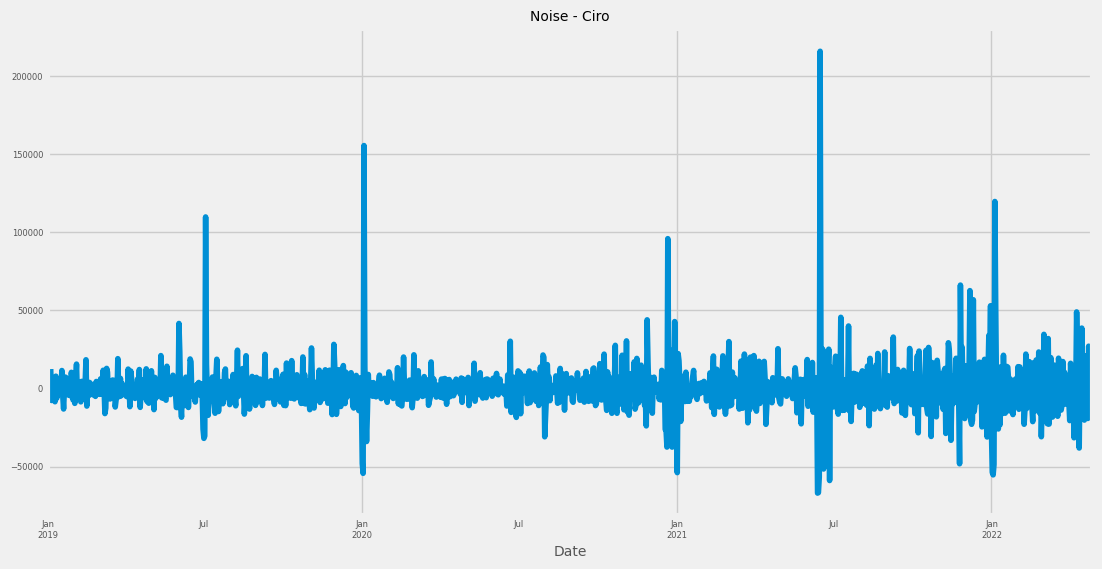

In [50]:

noise = decomposition_ciro.resid

noise.plot(figsize=(12, 6), fontsize=6)

plt.xlabel('Date', fontsize=10)

plt.title('Noise - Ciro', fontsize=10)

plt.show()

#### Veride seasonality yok, belli noktalarda outlier kaynaklı noise mevcurt. Genel anlamda stationary olarak ilerlemeyen veri için ARIMA modeli uygun. Outlier baskılamak ya da silmek az olan verinin davranışını etkileyeceği için RobustScaler ile daha az etkilenerek formatlanıp modellenebilir.

### Stationary statistical testing ADF
**Augmented Dickey Fuller test --> H0: non-stationary**

In [51]:
from statsmodels.tsa.stattools import adfuller

In [52]:
adf_test = adfuller(sub_df["SatisAdet"])

In [53]:
adf_test1 = adfuller(sub_df["Ciro"])

In [54]:
print(f"p-value: {adf_test[1]}")

p-value: 0.009435710811947778


In [55]:
print(f"p-value: {adf_test1[1]}")

p-value: 0.22457966303955557


### Saving dates for other uses.

In [59]:
timestamp = sub_df.index

In [60]:
timestamp

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2022-04-19', '2022-04-20', '2022-04-21', '2022-04-22',
               '2022-04-23', '2022-04-24', '2022-04-25', '2022-04-26',
               '2022-04-27', '2022-04-28'],
              dtype='datetime64[ns]', name='Gun', length=1214, freq=None)

#### ARIMA Modeling

- If the PACF plot has a significant spike at lag p, but not beyond; the ACF plot decays more gradually, This may suggest an
ARIMA(p, d, 0) model.
- If the ACF plot has a significant spike at lag q, but not beyond; the PACF plot decays more gradually.
This may suggest an ARIMA(0, d, q) model.

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
train_data, test_data = train_test_split(sub_df, test_size=7, shuffle=False)

In [69]:
X_train = train_data['SatisAdet']
y_train = train_data['Ciro']

In [70]:
X_test = test_data['SatisAdet']
y_test = test_data['Ciro']

In [71]:
from statsmodels.tsa.arima.model import ARIMA

In [72]:
model = ARIMA(y_train,
            order = (2, 1, 0),
            exog = X_train,
            dates = timestamp)

C:\Users\Erkut\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Erkut\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Erkut\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [73]:
fitted_model = model.fit()

In [74]:
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                   Ciro   No. Observations:                 1207
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -13084.492
Date:                Mon, 29 Jan 2024   AIC                          26176.985
Time:                        17:17:21   BIC                          26197.365
Sample:                    01-01-2019   HQIC                         26184.660
                         - 04-21-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SatisAdet    410.7969      1.850    222.064      0.000     407.171     414.423
ar.L1         -0.5268      0.018    -28.602      0.000      -0.563      -0.491
ar.L2         -0.2536      0.015    -17.201      0.0

### Residual Analysis

In [75]:
redids = fitted_model.resid[1:]

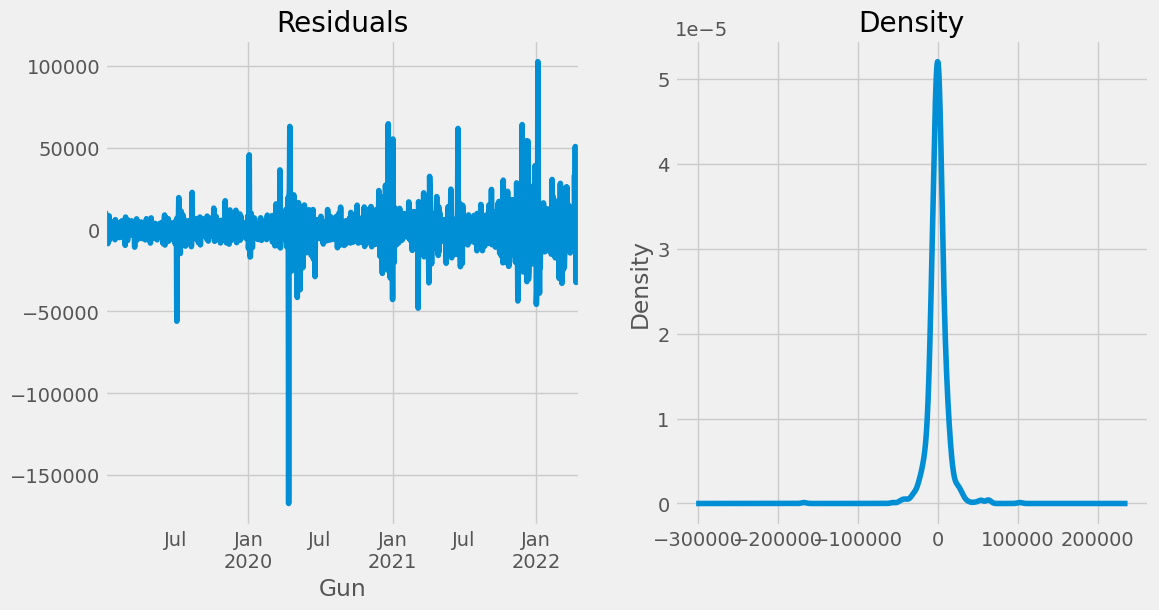

In [76]:
fig, ax = plt.subplots(1,2,  figsize=(12, 6))

redids.plot(title = "Residuals", ax = ax[0])
redids.plot(title = "Density", kind = "kde", ax = ax[1])

plt.show()

### Artıkların ortalaması 0 ve geniş olmayan bir yapıda bu iyiyie işaret.
### Artıklar genel bir trend sergilememiş. Aykırı gözlem olan bölgelerde aykırı gözlemlere uygun residuallar oluşmuş.

In [77]:
y_test.index[-1]

Timestamp('2022-04-28 00:00:00')

In [80]:
preds = fitted_model.predict(start = y_test.index[0],
                            end= y_test.index[-1],
                            exog = X_test,
                            dynamic=False)

In [81]:
preds

2022-04-22     85832.695270
2022-04-23     87482.953562
2022-04-24    101065.279198
2022-04-25     86046.671144
2022-04-26     89898.698439
2022-04-27     87931.533802
2022-04-28     96667.632273
Freq: D, Name: predicted_mean, dtype: float64

In [82]:
from sklearn.metrics import mean_absolute_error

In [83]:
mae = mean_absolute_error(y_test, pred)

In [84]:
mae

10691.034838373966

In [86]:
y_test.std()

17845.755346993916

### Model Tuning for ARIMA params (p, q, d)

In [91]:
import itertools

In [89]:
p = d = q = range(0, 5)

In [92]:
pdq_combinations = list(itertools.product(p, d, q))

In [94]:
best_mae = float('inf')
best_params = None

In [96]:
for pdq in pdq_combinations:
    try:
        model = sm.tsa.ARIMA(y_train, order=pdq, exog = X_train, dates = timestamp, freq = 'D')
        fitted_model = model.fit()

        predictions = fitted_model.predict(start = y_test.index[0], end= y_test.index[-1], exog = X_test, dynamic=False)
        mae = mean_absolute_error(y_test, predictions)

        if mae < best_mae:
            best_mae = mae
            best_params = pdq

    except Exception as e:
        continue

print("Best ARIMA Parameters:", best_params)
print("Best Mean Absolute Error:", best_mae)

C:\Users\Erkut\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Erkut\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Erkut\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Erkut\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Erkut\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

Best ARIMA Parameters: (4, 3, 1)
Best Mean Absolute Error: 8963.969793028416


###  Final Tuned Model

In [180]:
model = ARIMA(y_train,
            order = (4, 3, 1),
            exog = X_train,
            dates = timestamp)

C:\Users\Erkut\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Erkut\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Erkut\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [181]:
tuned_model = model.fit()

C:\Users\Erkut\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [182]:
preds = fitted_model.predict(start = y_test.index[0],
                            end= y_test.index[-1],
                            exog = X_test,
                            dynamic=False)

In [183]:
preds

2022-04-22    88608.087222
2022-04-23    87668.679501
2022-04-24    96614.406075
2022-04-25    84876.763114
2022-04-26    87617.932328
2022-04-27    85125.319615
2022-04-28    94136.695794
Freq: D, Name: predicted_mean, dtype: float64

In [188]:
y_test

Gun
2022-04-22     81352.0
2022-04-23     74584.0
2022-04-24    120036.0
2022-04-25     82947.0
2022-04-26    101008.0
2022-04-27     75665.0
2022-04-28    108679.0
Name: Ciro, dtype: float64

In [187]:
pred_array = preds.to_numpy()
y_test_array = y_test.to_numpy()

In [189]:
test_mae_loss = (np.abs(pred_array - X_test_array))

In [190]:
test_mae_loss

array([ 7256.08722234, 13084.67950091, 23421.59392461,  1929.76311398,
       13390.06767151,  9460.3196153 , 14542.3042056 ])

### Prophet Application

In [104]:
from prophet import Prophet

### Prophet

In [132]:
df_prophet = sub_df.reset_index().rename(columns = {"Gun": "ds", "Ciro" : "y"})

In [133]:
df_prophet.head()

,ds,SatisAdet,y
0,2019-01-01,20.0,13755.0
1,2019-01-02,19.0,12881.0
2,2019-01-03,165.0,82048.0
3,2019-01-04,115.0,54725.0
4,2019-01-05,80.0,38586.0


In [138]:
df_prophet = df_prophet[:-7]

In [137]:
test_prophet = df_prophet.tail(7)

In [152]:
test_prophet

,ds,SatisAdet,y
1207,2022-04-22,59.0,81352.0
1208,2022-04-23,62.0,74584.0
1209,2022-04-24,85.0,120036.0
1210,2022-04-25,54.0,82947.0
1211,2022-04-26,63.0,101008.0
1212,2022-04-27,57.0,75665.0
1213,2022-04-28,79.0,108679.0


In [141]:
future = test_prophet.drop("y", axis = 1)

In [142]:
future

,ds,SatisAdet
1207,2022-04-22,59.0
1208,2022-04-23,62.0
1209,2022-04-24,85.0
1210,2022-04-25,54.0
1211,2022-04-26,63.0
1212,2022-04-27,57.0
1213,2022-04-28,79.0


In [139]:
model = Prophet(daily_seasonality=True)

In [140]:
model.add_regressor('SatisAdet')

In [144]:
model.fit(df_prophet)

21:34:06 - cmdstanpy - INFO - Chain [1] start processing
21:34:06 - cmdstanpy - INFO - Chain [1] done processing


In [146]:
forecast = model.predict(future)

<Figure size 1800x600 with 0 Axes>

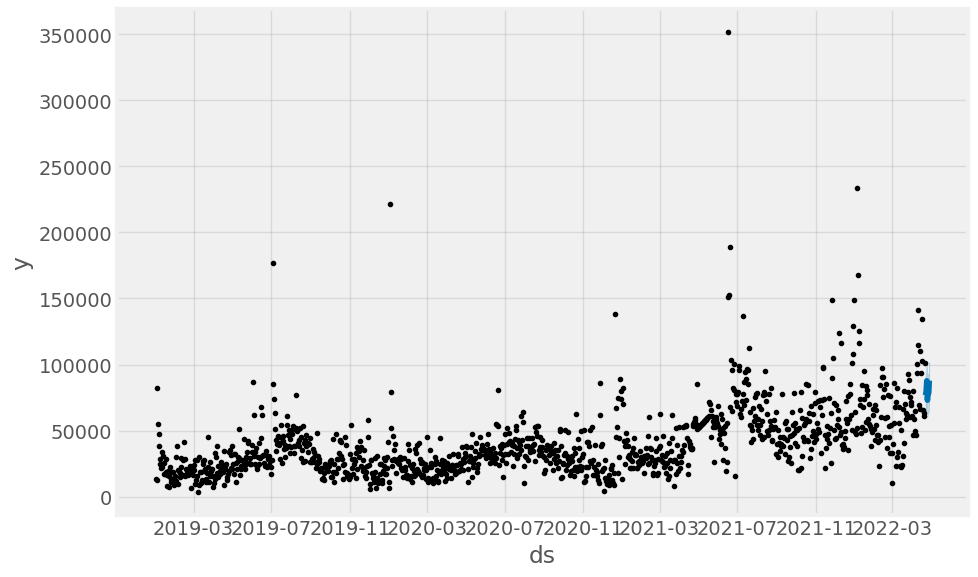

In [160]:
plt.figure(figsize=(18, 6))

model.plot(forecast)

plt.show()

In [148]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,SatisAdet,SatisAdet_lower,SatisAdet_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-04-22,65969.503052,62616.140916,91575.775976,65969.503052,65969.503052,-3470.871737,-3470.871737,-3470.871737,10857.603711,...,1319.881707,1319.881707,1319.881707,2897.805542,2897.805542,2897.805542,0.0,0.0,0.0,76827.106763
1,2022-04-23,66058.509759,66186.039494,94967.485327,66058.509759,66058.509759,-2245.081572,-2245.081572,-2245.081572,13714.350319,...,2304.952323,2304.952323,2304.952323,3543.691368,3543.691368,3543.691368,0.0,0.0,0.0,79772.860079
2,2022-04-24,66147.516467,72470.878476,102741.248758,66147.516467,66147.516467,7152.643025,7152.643025,7152.643025,21607.065938,...,145.669201,145.669201,145.669201,4197.965511,4197.965511,4197.965511,0.0,0.0,0.0,87754.582404
3,2022-04-25,66236.523174,59484.156020,87088.306762,66236.523174,66236.523174,-5513.855346,-5513.855346,-5513.855346,6805.549190,...,-2640.916435,-2640.916435,-2640.916435,4849.532770,4849.532770,4849.532770,0.0,0.0,0.0,73042.072364
4,2022-04-26,66325.529881,64798.734255,93174.328194,66325.529881,66325.529881,-1836.484851,-1836.484851,-1836.484851,12865.890520,...,-895.969153,-895.969153,-895.969153,5487.556323,5487.556323,5487.556323,0.0,0.0,0.0,79191.420401
5,2022-04-27,66414.536589,63721.405315,92106.324206,66414.536589,66414.536589,-4288.065181,-4288.065181,-4288.065181,11857.932369,...,-66.501181,-66.501181,-66.501181,6101.710530,6101.710530,6101.710530,0.0,0.0,0.0,78272.468958
6,2022-04-28,66503.543296,72544.248757,101688.338656,66503.543296,66503.543296,4701.062695,4701.062695,4701.062695,21327.149578,...,-167.116462,-167.116462,-167.116462,6682.415145,6682.415145,6682.415145,0.0,0.0,0.0,87830.692875


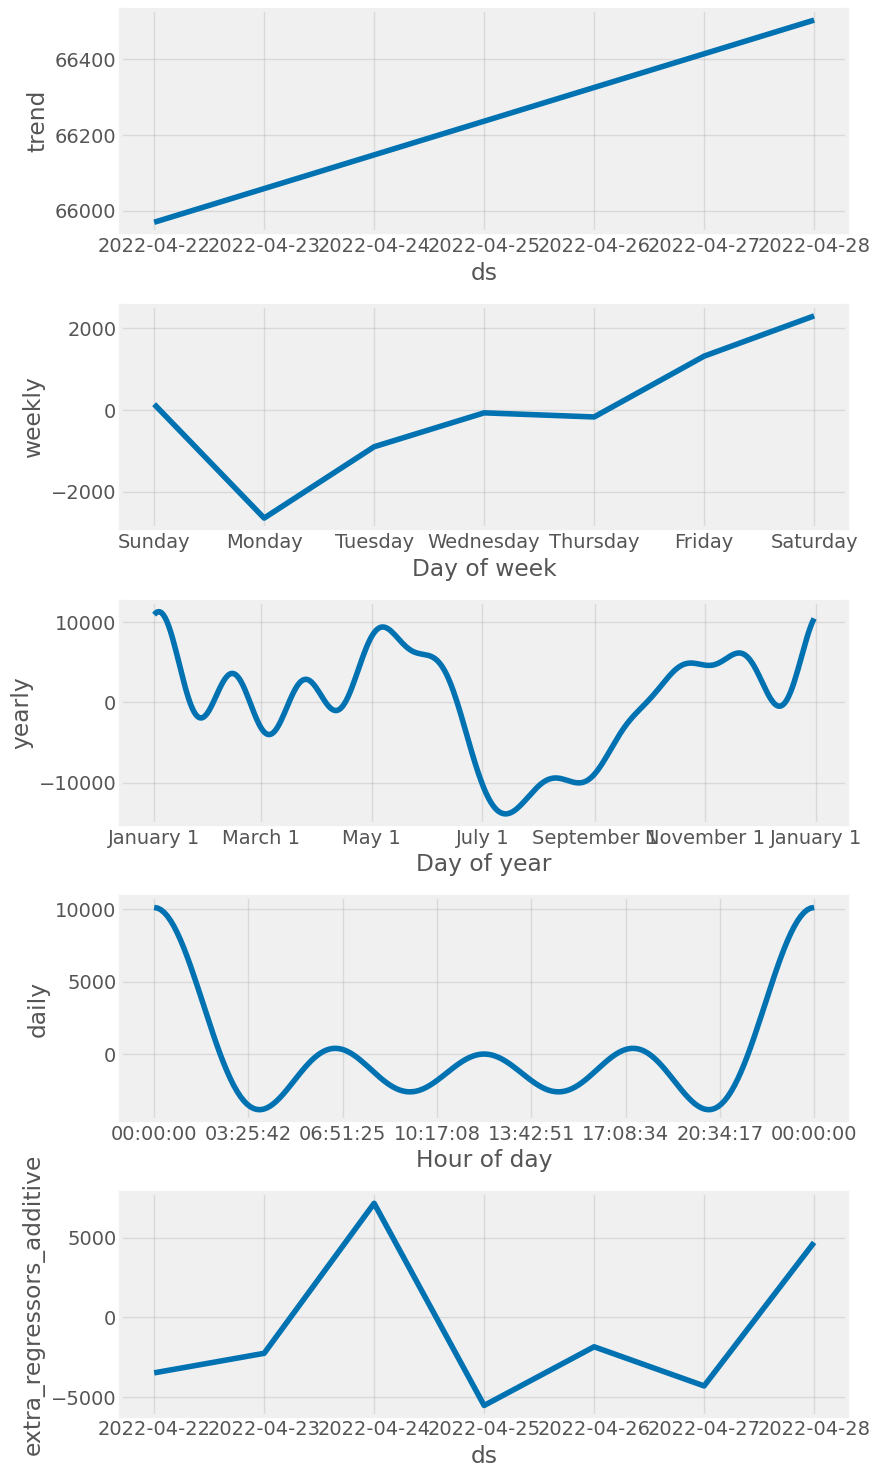

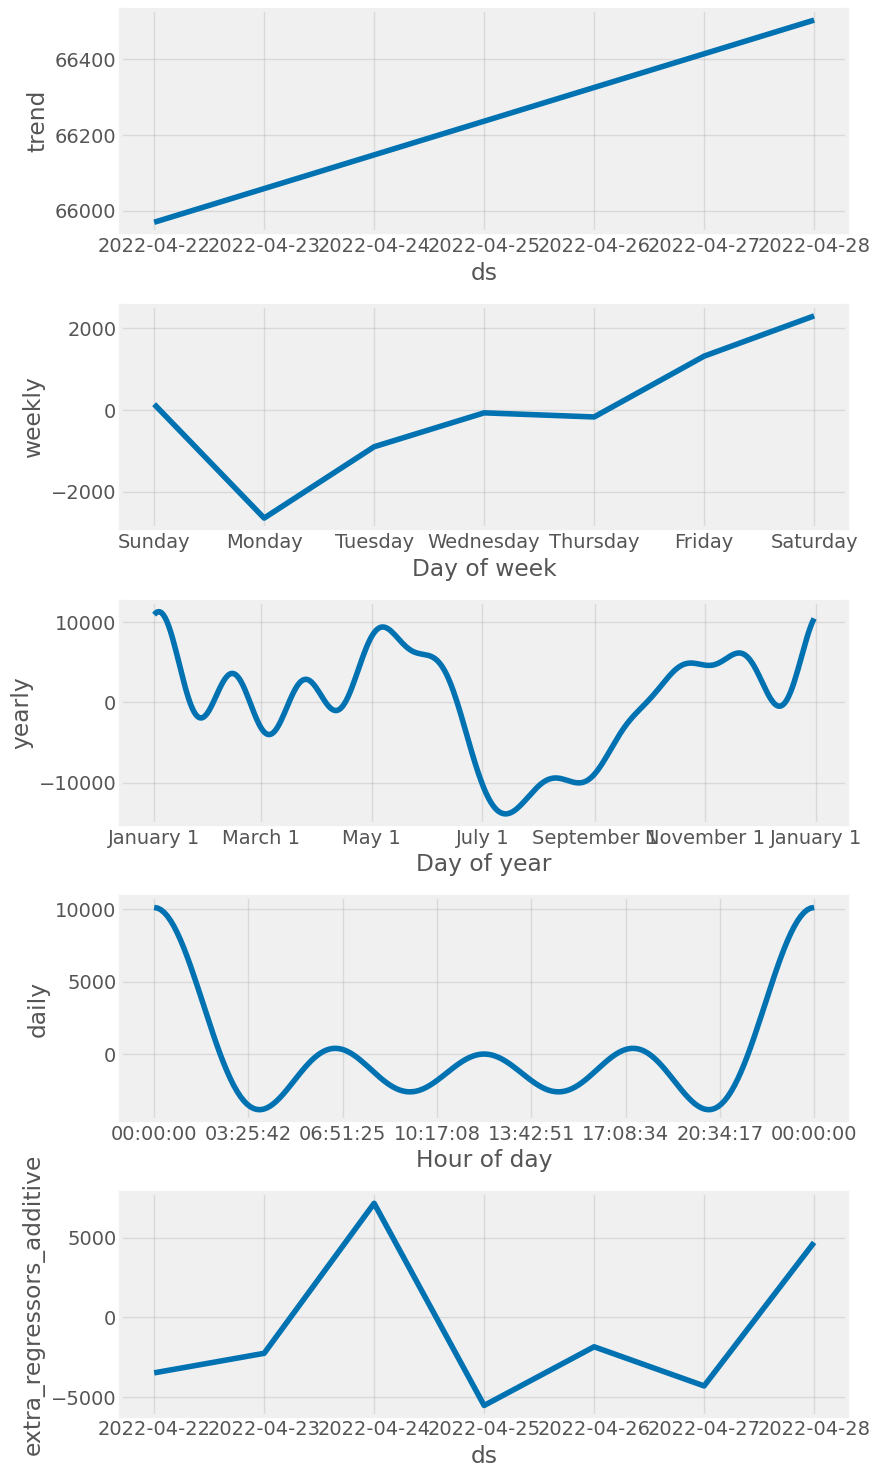

In [151]:
model.plot_components(forecast)

In [153]:
mae = mean_absolute_error(test_prophet["y"], forecast["yhat"])

In [154]:
mae

13881.779175699852

In [162]:
test_mae_loss = (forecast["yhat"]- test_prophet["y"]).abs()

In [168]:
pred_array = forecast["yhat"].to_numpy()
X_test_array = test_prophet["y"].to_numpy()

In [173]:
type(pred_array[1])

numpy.float64

In [172]:
type(X_test_array[1])

numpy.float64

In [177]:
test_mae_loss = (np.abs(pred_array - X_test_array))

In [178]:
test_mae_loss

array([ 4524.89323679,  5188.86007851, 32281.41759581,  9904.92763611,
       21816.57959904,  2607.46895824, 20848.30712541])